<a href="https://colab.research.google.com/github/ris-shar/NeuralNetworkFromScratch/blob/main/Neural_networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
#getting the mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
au = x_test
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
data = mnist.load_data()
data = np.array(data)
m, n = data.shape

<ipython-input-3-1aa1b252abdf>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [4]:
x_train = x_train.reshape(60000,784)
x_train = x_train.T
x_train.shape

(784, 60000)

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Iteration:  0
[4 5 4 ... 5 5 4] [5 0 4 ... 5 6 8]
0.1047


<ipython-input-5-9f0ad550be7a>:12: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
<ipython-input-5-9f0ad550be7a>:12: RuntimeWarning: invalid value encountered in true_divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  10
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  20
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  30
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  40
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  50
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  60
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  70
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  80
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  90
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  100
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  110
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  120
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  130
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
Iteration:  140
[0 0 0 ... 0 0 0] [5 0 4 ... 5 6 8]
0.09871666666666666
I

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  5


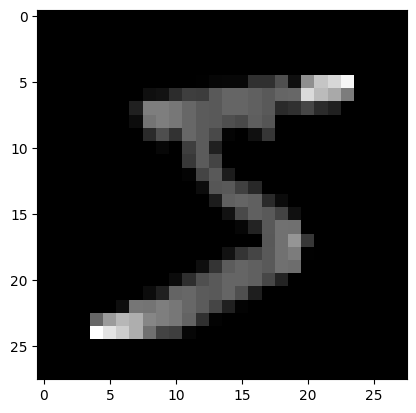

Prediction:  [0]
Label:  0


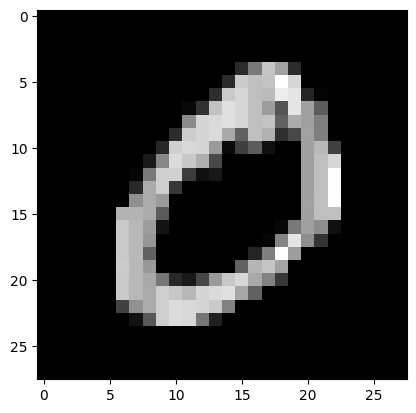

Prediction:  [0]
Label:  4


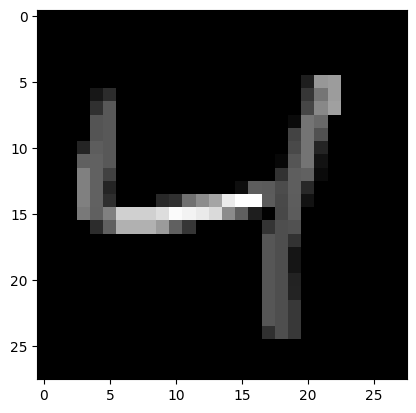

Prediction:  [0]
Label:  1


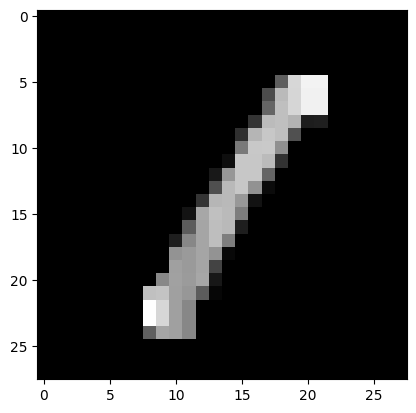

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)